<a href="https://colab.research.google.com/github/Ranga-Kulathunga/EN-4353-Radar-and-Navigation/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EN 4353 - Radar and Navigation - Assignment 02

### Topic: Implementation of Doppler Filter Bank
### Name: I.G.R.M. Kulathunga
### Index: 170318X

Link to Colab Notebook: https://colab.research.google.com/drive/1sSBJwQ1I6J0koHTreH5nX4kV6369KpKo?usp=sharing

# Initialization

## Import Libraries and Load the Data Files

In [91]:
# import libraries
import pandas as pd
import cmath
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import cycle
cycol = cycle('bgrcmk')

plt.style.use('default')

# load .csv files
path_1 = 'https://raw.githubusercontent.com/Ranga-Kulathunga/EN-4353-Radar-and-Navigation/main/Assignment-02/imag_component.csv' 
Q_n = pd.read_csv(path_1, sep=';', header=None, squeeze=True)

path_2 = 'https://raw.githubusercontent.com/Ranga-Kulathunga/EN-4353-Radar-and-Navigation/main/Assignment-02/real_component.csv' 
I_n = pd.read_csv(path_2, sep=';', header=None, squeeze=True)


## Define Parameters

* Number of down-sampled data in data files:
>$n = 27000$

* Initial sampling frequency:
>$F_{s\_init} = 1080\;kHz$

* Sampling time:
>$T_s = \frac{1}{T_s} = \frac{1}{1080000} = 0.926 \mu s$

* Pulse Repetition Frequency (PRF): 
>$f_r = 1800\;Hz$

* Downsamplin factor:
>$M = 20$

* Number of range slots:  
>$C = 30$   

* Number of pulses:
>$N = \frac{n}{N} = \frac{27000}{30} = 900$

* Speed of light: 
>$C_{light} = 3\times10^{8}\;m\;s^{-1}$

* Horizontal beam width:
>$\theta_H = 2^\circ$

* Speed of rotation of the radar: 
>$\omega = 12\;rpm$

* Radar frequency:
>$f_{radar} = 720\;MHz$

* Complex Notation:
> $x[n] = I[n] + jQ[n]$

In [92]:
# initialize parameters
n = len(Q_n) # number of samples in data files
F_s_init = 1080*1000 # initial sampling frequency in Hz
f_r = 1800 # pulse repitition frequency in Hz
M = 20 # downsamplin factor
C = 30 # number of bins
F_s = F_s_init/M # sampling frequecy after downsampling

C_light = 3e8 # speed of light in m/s
theta_H = 2 # horizontal beam width in degrees
omega = 12 # speed of rotation of the radar in rpm
theta_0 = 0 # initial azimuth angle in degrees
f_radar = 720e6 # radar frequency

# complex notation of data
x_df = I_n + 1j*Q_n 
x_n = x_df.to_numpy()

N = int(n/C) # number of pulses transmitted

## Visualization of Data

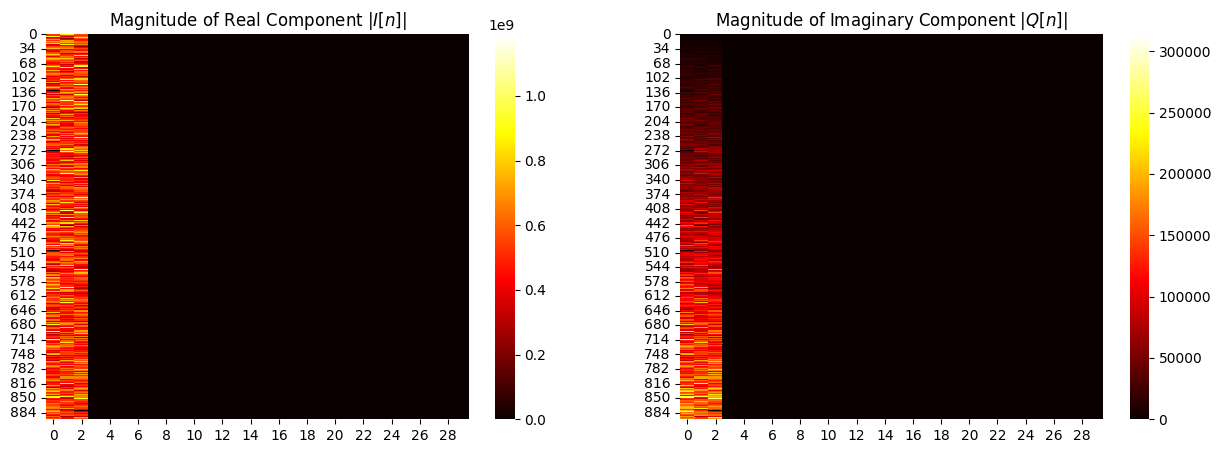

In [93]:
DM = x_n.reshape(N, C) # Data Matrix
DM_real = DM.real # real components of Data Matrix
DM_imag = DM.imag # imaginary components of Data Matrix

# plot quadrature components
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Magnitude of Real Component $|I[n]|$', fontsize = 12)
G1 = sns.heatmap(DM_real, square=False, annot=False, cbar=True, cmap="hot", ax=ax1)

ax2.set_title('Magnitude of Imaginary Component $|Q[n]|$', fontsize = 12)
G2 = sns.heatmap(DM_imag, square=False, annot=False, cbar=True, cmap="hot", ax=ax2)


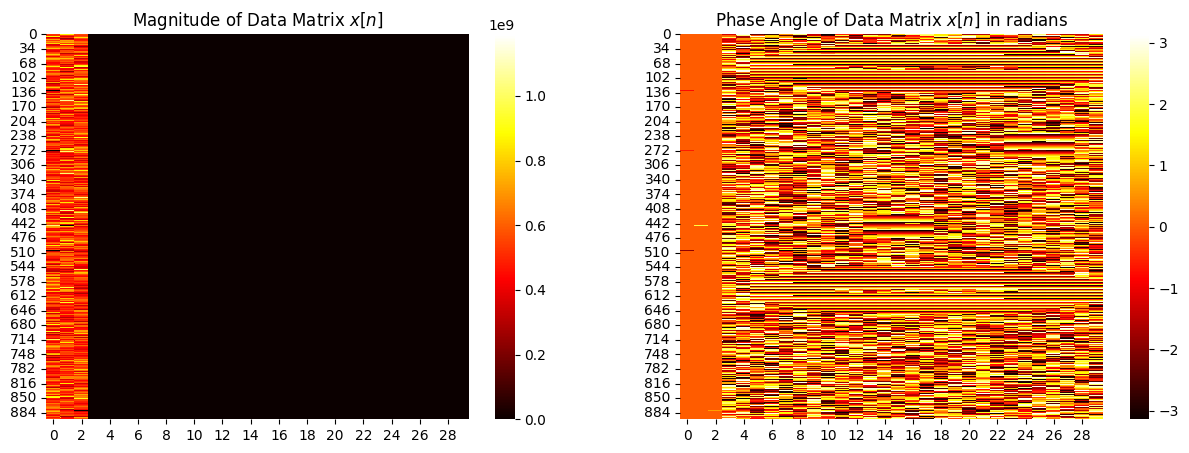

In [94]:
DM_mag = abs(DM) # magnitude of Data Matrix
phase = np.vectorize(lambda x: cmath.phase(x))
DM_phase = phase(DM) # phase of Data Matrix

# plot magnitude and phase of data matrix
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Magnitude of Data Matrix $x[n]$', fontsize = 12)
G1 = sns.heatmap(DM_mag, square=False, annot=False, cbar=True, cmap="hot", ax=ax1)

ax2.set_title('Phase Angle of Data Matrix $x[n]$ in radians', fontsize = 12)
G2 = sns.heatmap(DM_phase, square=False, annot=False, cbar=True, cmap="hot", ax=ax2)

# Question 01

$I(t) = A(t)\ cos(\theta(t))$

$I(t) = A(t)\ cos(2\pi f_d t-\pi)$

* Initial sampling:
>$t = n T_s, \ Where \ T_s = \frac{1}{F_{s_{init}}}$ \\
>$I_0[n] = A(nT_s) \cos(2\pi f_d(nT_s)-\pi)$ \\

* MTI Cancellation:  
>$I[n] = I_0[n]\ h[n]$ \
>$h[n] = \delta[n]-4\delta[n-1]+\delta[n-2]$
>$I[n] = I_0[n]\ (\delta[n]-4\delta[n-1]+\delta[n-2])$ \
>$I[n] = I_0[n]-4I_0[n-1]+I_0[n-2]$ \
>$I[n] = A(nT_s)\ cos(kn-\pi)-4A((n-1)T_s)\ cos(k(n-1)-\pi)+A((n-2)T_s)\ cos(k(n-2)-\pi), \ Where \ k=2 \pi f_d T_s$

* Assumptions:
>$A(nT_s) \approx A((n-1)T_s) \approx A((n-2)T_s)$ \\
> First data of the data set starts from beginning of an echo pulse. \\
> Data set contains data for a whole number of pulses.

* Simplification:
>$I[n] = A(nT_s)\ cos(kn-\pi)-4A(nT_s)\ cos(k(n-1)-\pi))+A(nT_s)\ cos(k(n-2)-\pi))$
>$I[n] = A[n]\ cos(kn-\pi)-4A[n]\ cos(k(n-1)-\pi))+A[n]\ cos(k(n-2)-\pi))$
>$I[n] = A[n]\ \{cos(kn-\pi)+ cos(k(n-2)-\pi)-4 \cos(k(n-1)-\pi)\}$
>$I[n] = A[n]\ \{2\ cos(k(n-1)-\pi)\ cos(k)-4 \cos(k(n-1)-\pi)\}$
>$I[n] = -2A[n]\ cos(k(n-1)-\pi)\ \{2 - cos(k)\}$
>$I[n] = 2A[n]\ cos(k(n-1))\ \{1 + sin^2(k/2)\}$

* Downsampling:
>$\hat n = 20n + 10, \ Since\ M = 20\ and\ mid (10^{th})\ sample\ is\ considered$
>$I[\hat n] = 2A((20\hat n+10)T_s)\ cos(2 \pi f_d T_s((20\hat n+10)-1))\ \{1 + sin^2(2 \pi f_d T_s/2)\}$

>$Since,\ T_s << 1\;s\ and\ f_d\ is\ few\ hundreds\ of\ Hz,$
>>$sin^2(2 \pi f_d T_s/2) \approx 0$

>>$\hat n => n$

>>$I[n] = 2A((20n+10)T_s)\ cos(2 \pi f_d T_s(20n+9))$

>$Similarly,$ \\
>>$Q[n] = 2A((20n+10)T_s)\ sin(2 \pi f_d T_s(20n+9))$

* Expression:
> $x[n] = I[n] + j\ Q[n]$ \\
> $x[n] = 2A((20n+10)T_s)\ cos(2 \pi f_d T_s(20n+9)) + j\ \{2A((20n+10)T_s)\ sin(2 \pi f_d T_s(20n+9))\}$ \\
> $x[n] = 2A((20n+10)T_s)\ e^{j2 \pi f_d T_s(20n+9)}$

# Question 02

* Ground clutter is close to zero velocities. So doppler freqency $f_d$ tends to zero when the pulses are reflected by fixed targets.

* Phase information is used to remove ground clutter and fix objects.

>Phase of $x[n] = \theta(t) = 2 \pi f_d T_s (20n + 9) → 0,\ where\ f_d → 0$

* Therefore, each cell with a small phase angle can be considered as ground clutter.

# Question 03

* Zero Velocity Filter (ZVF) is applied to remove any ground clutter present by setting complex numbers which represent ground clutter to zero. Threshold value for this filtering is set to a small value $1\times 10^{-3}$ (this value is decided by observing the above phase angle plot for the data matrix).

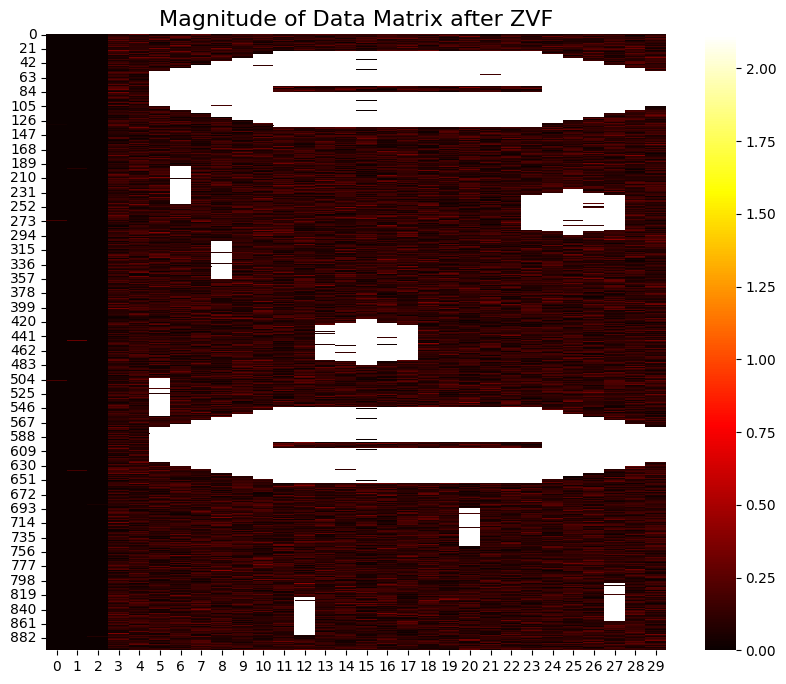

In [95]:
TH_phase = 1e-3 # threshold for ZVF

# implement Zero Velocity Filter
def ZVF(matrix, threshold):
  matrix_phase = phase(matrix)
  phase_filt = np.where(threshold < abs(matrix_phase), matrix, 0)
  
  return phase_filt

DM_phase_filtered = ZVF(DM, TH_phase)

mag_DM_phase_filtered = abs(DM_phase_filtered)

# visualization of data matrix after ZVF
f, ax = plt.subplots(figsize=(10,8))
plt.title("Magnitude of Data Matrix after ZVF", fontsize = 16)
ax = sns.heatmap(mag_DM_phase_filtered, square=False, annot=False, cmap="hot", cbar=True)

* As a result of the above filtering, first 3 bins are observed as ground clutter. This is also confirmed by the plots the magnitude of first 3 bins and remaining bins separately.

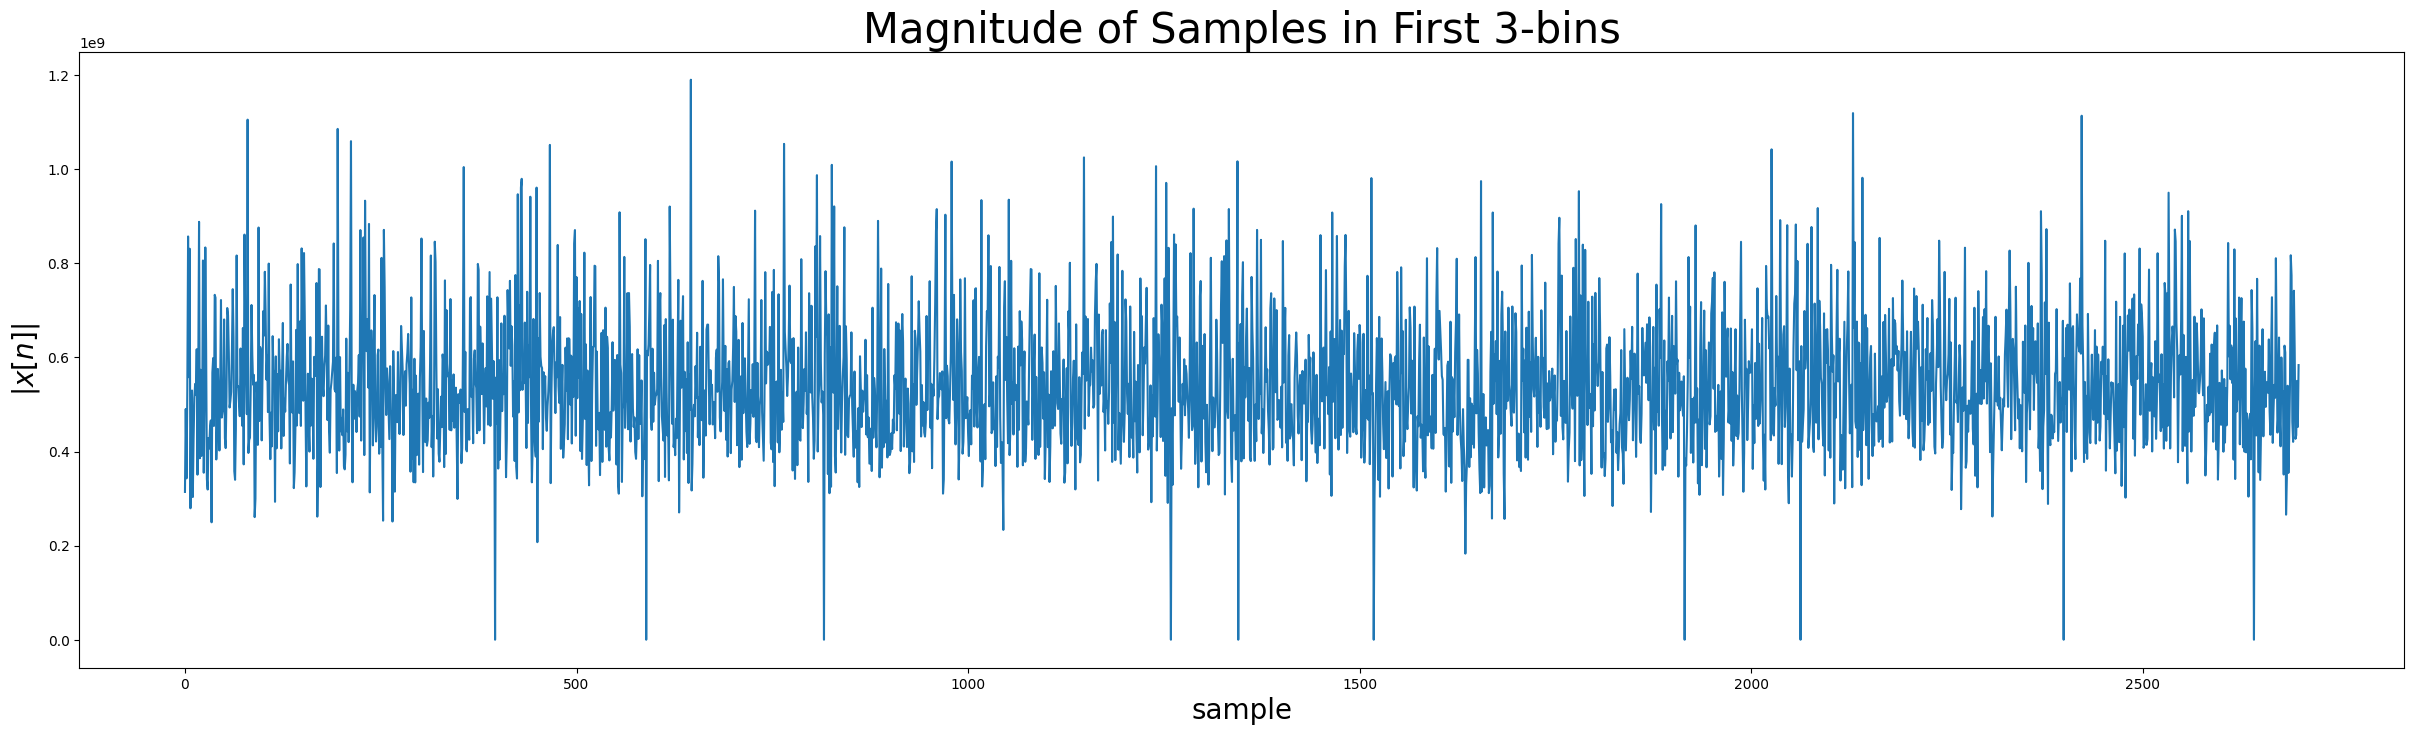

In [96]:
G_clutter_mag = DM_mag[:,0:3].flatten() # magnitudes of first 3 bins into a 1D array
remaining_mag = DM_mag[:,3:].flatten() # magnitudes of remaining bins into a 1D array
G_Clutter_phase = DM_phase[:,0:3].flatten() # phase of first 3 bins into a 1D array

# magnitude of first 3 bins
plt.figure(figsize=(30, 8))
ax=plt.plot(G_clutter_mag)
ax=plt.ylabel('$|x[n]|$', fontsize = 20)
ax=plt.xlabel('sample', fontsize = 20)
ax=plt.title('Magnitude of Samples in First 3-bins', fontsize = 30)

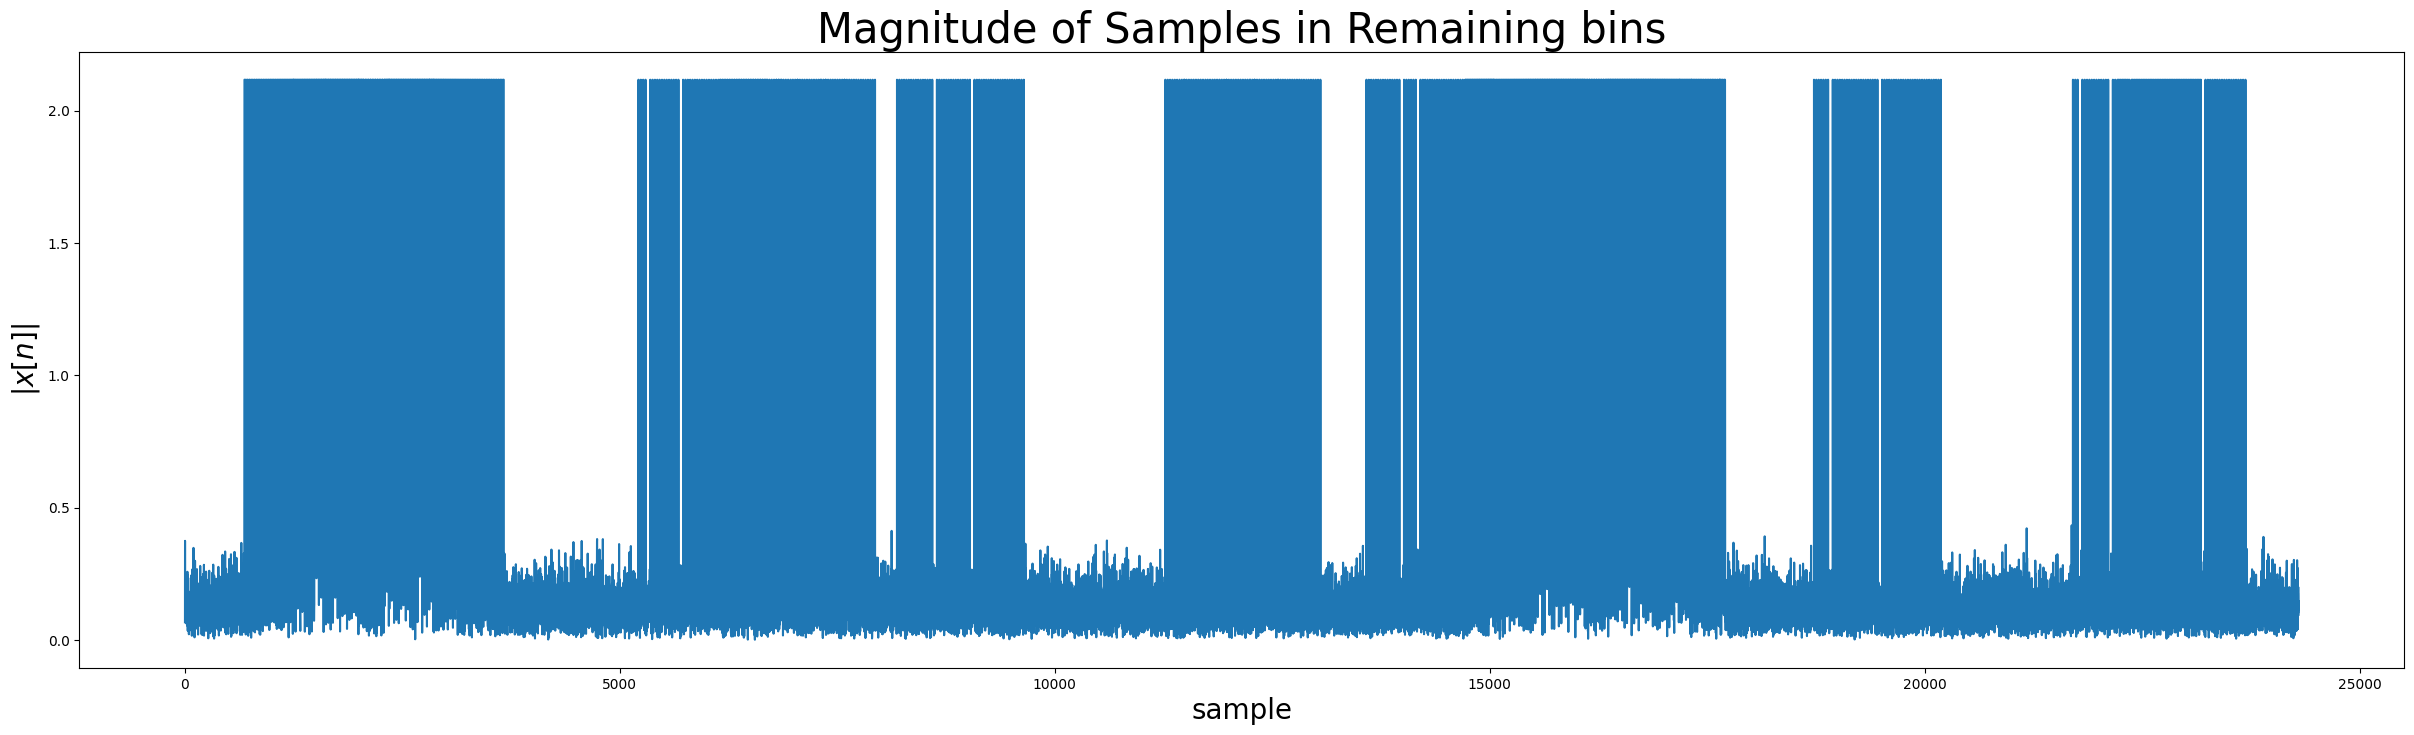

In [97]:
# magnitude of remaining bins
plt.figure(figsize=(30, 8))
ax=plt.plot(remaining_mag)
ax=plt.ylabel('$|x[n]|$', fontsize = 20)
ax=plt.xlabel('sample', fontsize = 20)
ax=plt.title('Magnitude of Samples in Remaining bins', fontsize = 30)

* The magnitude of the samples in first 3 bins are very large values while the remaining are smaller.
* Furthermore, phase of a large number of cells in first 3 bins are close to zero and it is clearly shown below as a plot. Ground clutter is presented within first 3 bins.

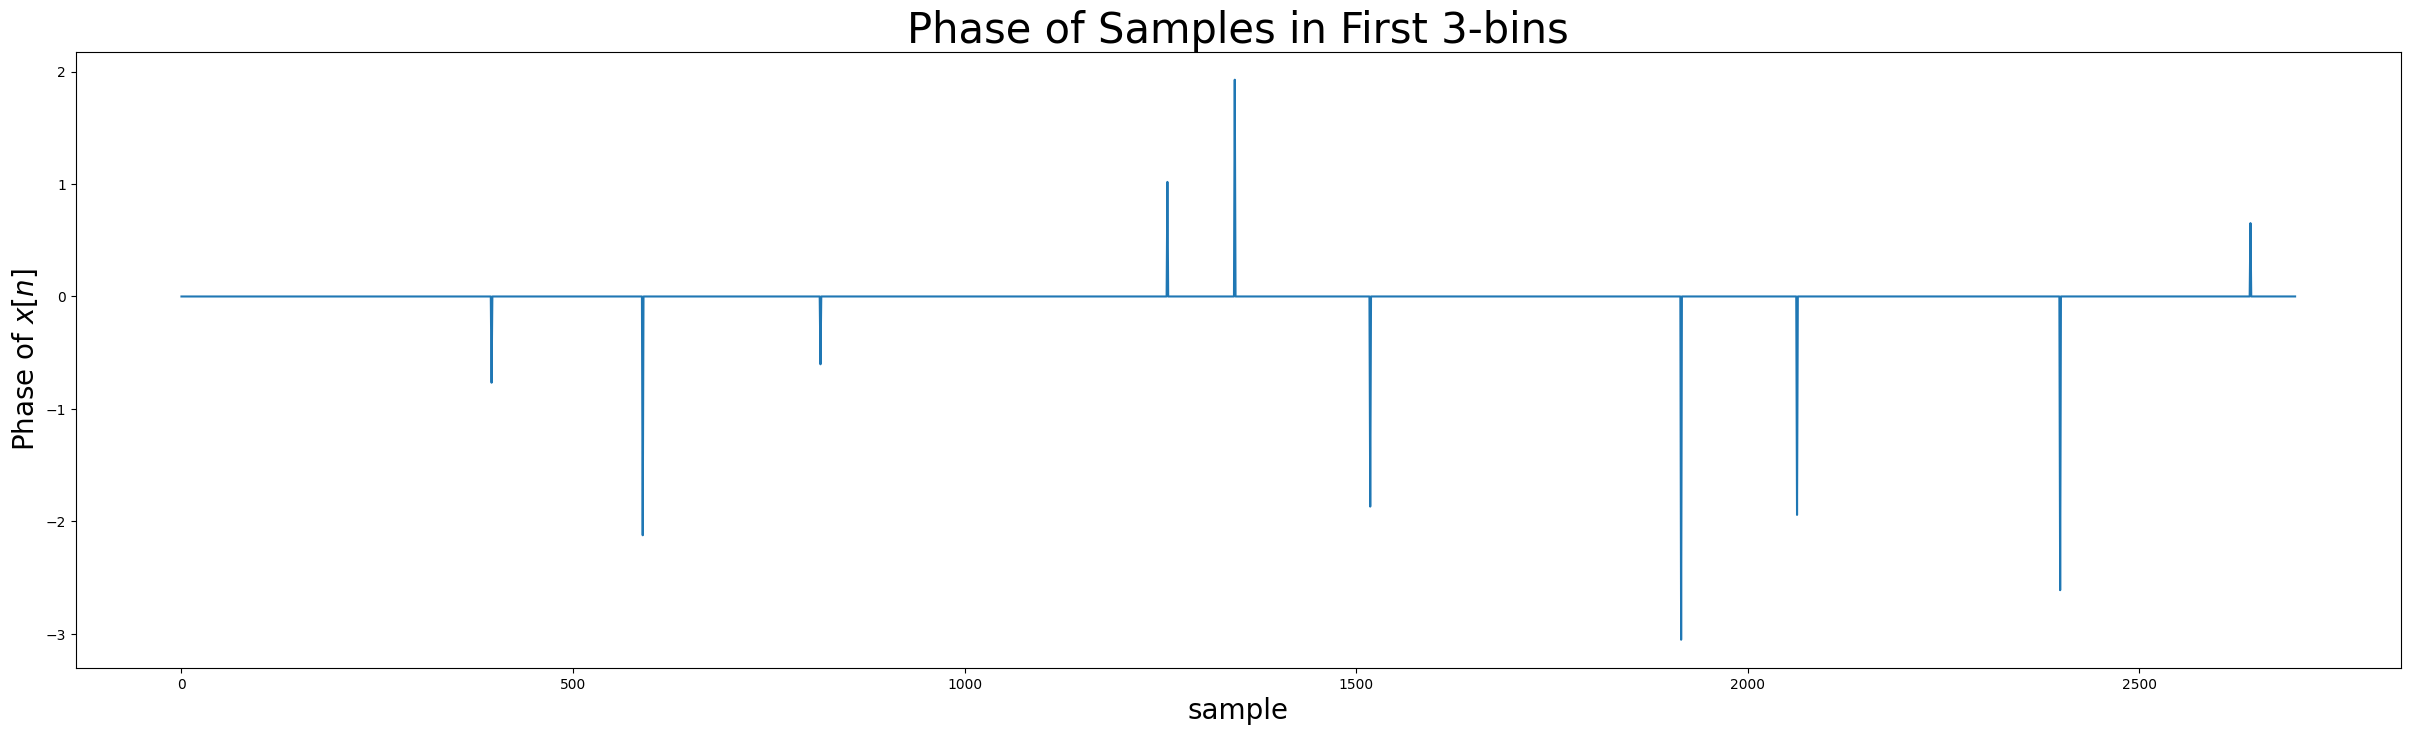

In [98]:
# phase of first 3 bins
plt.figure(figsize=(30, 8))
ax=plt.plot(G_Clutter_phase)
ax=plt.ylabel('Phase of $x[n]$', fontsize = 20)
ax=plt.xlabel('sample', fontsize = 20)
ax=plt.title('Phase of Samples in First 3-bins', fontsize = 30)

# Question 04

## Center Frequencies

* Wavelength of the signal:
> $\lambda = \frac{C_{light}}{f_{radar}} = \frac{3\times 10^8\;m\;s^{-1}}{720\times 10^6\;Hz} = 0.417\;m$

* Center frequency for each filter is calculated using the following equation:
> $f_d = \frac{2V_r}{\lambda}$

Object  | Velocity ($ms^{-1}$)   | Threshold | Encode |Center Frequency ($Hz$)
--------|------------------------|-----------|------- | ---------------
Cloud | 50 | 1.05 | 1 | 240
Ground Clutter | 0 |-|2 | 0
Rain Clutter | 20 | 0.9 |3| 96
Birds | 35 | 1.05 | 4 | 168
Air-Crafts | 150 | 0.5 | 5 | 720
No object | - | - | 0 | -


In [99]:
# object information [speed, threhsold, encode] 
dict_obj = {'No object':[None,None,0], 'Cloud':[50,1.05,1],'Ground Clutter':[0,None,2],'Rain Clutter':[20,0.9,3],'Birds':[35,1.05,4],'Air-Crafts':[150,0.5,5]}

# calculate doppler frequecies
dict_f_d = {}

for key, val in dict_obj.items():
  speed_obj = val[0]
  if speed_obj != None:
    f_d = 2*speed_obj/(C_light/f_radar)
    dict_f_d[key] = f_d
  else:
    dict_f_d[key] = None

print(dict_f_d)


{'No object': None, 'Cloud': 240.0, 'Ground Clutter': 0.0, 'Rain Clutter': 96.0, 'Birds': 168.0, 'Air-Crafts': 720.0}


## FFT

* Discrete Fourier Transform (DFT) for a discrete-time signal $x[n]; n = 0, 1, 2, ..., N-1$ for $N$ number of samples is defined as follows;

$$X(k) = \sum_{n = 0}^{N-1}x(n)e^{j\frac{2\pi}{N}kn},\ k = 0, 1, 2, N-1$$

* This transformation is done in an efficient way called Fast Fourier Transform (FFT).

* The first DFT coefficient, $X(0)$, is known as the DC component of the signal and it is equal to the sum of signal samples.

* Due to the symmetric property of the magnitude of the DFT coefficients, we only need the DFT coefficients with indices $k = 0, …, ⌈\frac{N-1}{2}⌉$, where $⌈·⌉$ is the ceiling operator.

* Although the frequencies of the DFT coefficients cover the range $[0-(N-1)\frac{F_r}{N}]\;Hz$ where $F_r$ is the PRF, in practice, we only need the frequencies up to $\frac{F_r}{2}$, which is also in agreement with the Nyquist theorem.

In [100]:
# plot FFT representation for single or multiple bins
def plot_FFT(matrix_FFT, title, n_pulses, f_doppler, PRF, is_single_bin = False):
  mag_FFT = np.abs(matrix_FFT)

  f = np.arange(0, PRF/2, step=PRF/N)
  
  plt.figure(figsize=(30, 8))
  ax=plt.ylabel('Magnitude of DFT of $x[n]$', fontsize = 20)
  ax=plt.xlabel('Frequency (Hz)', fontsize = 20)
  ax=plt.title(title, fontsize = 30)
  ax = plt.xticks(np.arange(0,PRF/2, (PRF*10)/N))

  if is_single_bin:
    color_0 = next(cycol)
  else:
    color_0 = None

  plt.plot(f, mag_FFT[:(N // 2)], color=color_0)

  for key,freq in f_doppler.items():
      col = next(cycol)
      if freq!=None:
        plt.vlines(x=freq, ymin=0, ymax=max(mag_FFT.flatten())+50, linestyles='--', colors=col, label=key)
  
  handles, labels = plt.gca().get_legend_handles_labels() 
  labels, ids = np.unique(labels, return_index=True)
  handles = [handles[i] for i in ids]
  plt.legend(handles, labels, loc='best', fontsize = 15)
  plt.show()
  return None

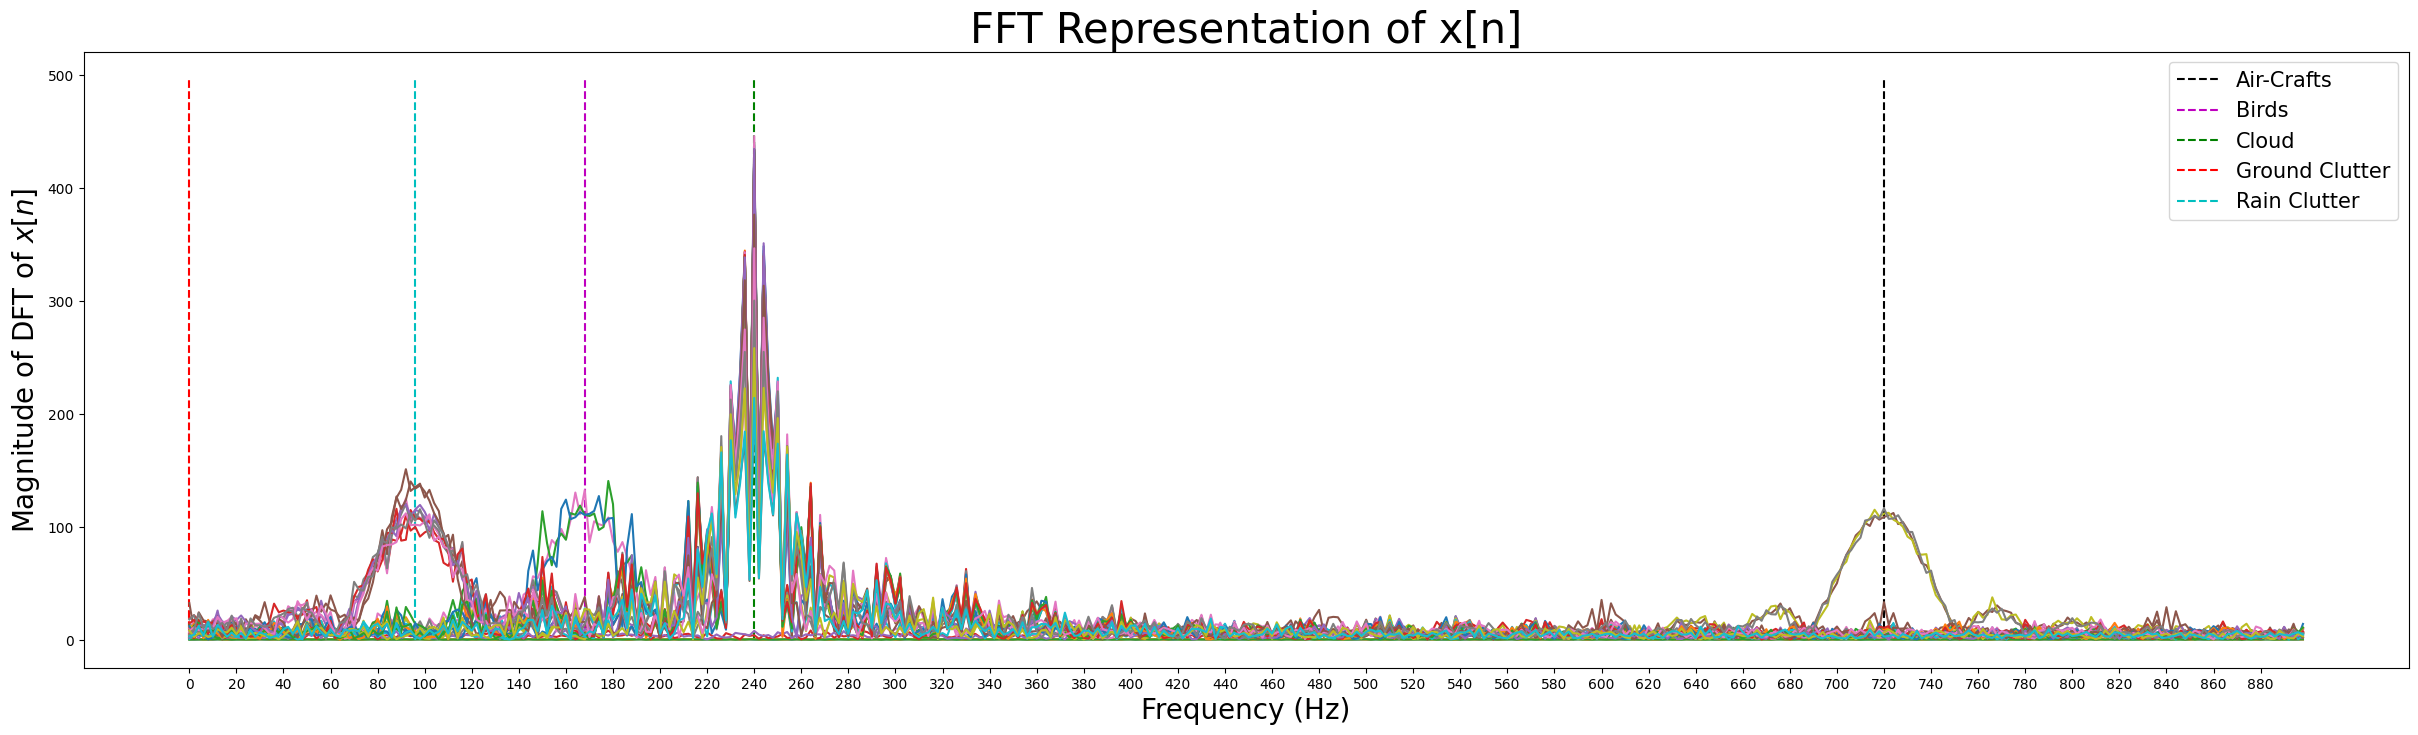

In [101]:
# DFT of data matrix without ground clutter using FFT
DM_FFT = np.fft.fft(DM_phase_filtered[:,:], axis=0)

# plot FFT representation for all bins
plot_FFT(DM_FFT, 'FFT Representation of x[n]', N, dict_f_d, f_r)

## Bandwidth

* Number of echoes from a point target causes the magnitude of DFT to increase.

* The cloud clutter has highest magnitude in DFT representation.

* Hence, it is selected as reference to find a suitable bandwidth for the velocity filters.

* By observing the above frequency spectrum, $36\;Hz$ is selected as bandwidth for the bandpass filter used in velocity filters.

In [102]:
# selected bandwidth in Hz for the bandpass filter
BW = 36

# Question 05

## Doppler Filter Bank

* Rectangular filter with $2\times BW$ width is defined as bandpass filter in the filter bank.

* Frequency spectrum $X[f]$ after applying FFT is passed through the filter bank.

> Let consider the output of doppler bank related the cloud filtering as $X_{cloud}[f]$.

> $X_{cloud}[f] = X[f]\times BPF_{|f_c-BW,\;f_c+BW|}$

> $X_{cloud}[n] = ifft(X_{cloud}[f])$

> Thresholding and encoding: \\
$\;\;If\;\;X_{cloud}[n_i] > threshold_{cloud} \\ \;\;\;\;Then,\;\;X_{cloud}[n_i] = encode_{cloud} \\ \;\;\;\;Otherwise,\;\;X_{cloud}[n_i] = 0$

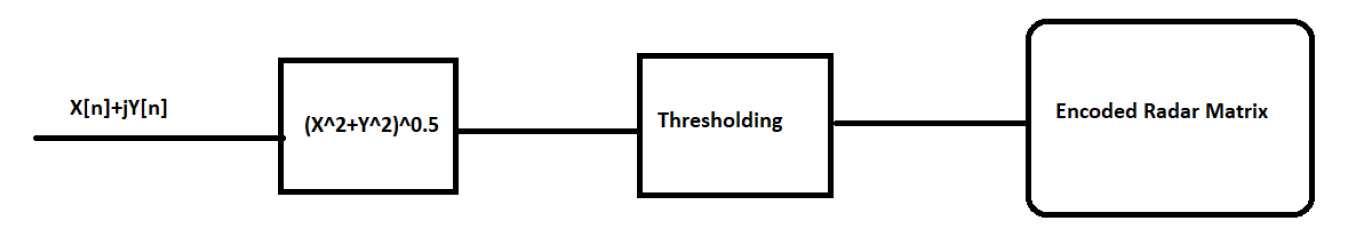

* The above steps are followed by other filters such that birds, rain clutter and targets in the filter bank.

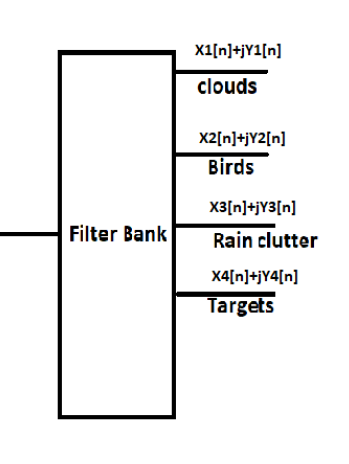



In [103]:
# implement bandpass filter
def BPF(l_level, u_level, PRF, N, plot):

  f = np.arange(0, PRF, step=PRF/N)
  H = 1.*((f >= l_level) & (f <= u_level))
  H = H.reshape(H.shape[0], 1) 
  if plot:
    plt.plot(H)
    
  return H   

Cloud  cut off frequencies  204.0 - 276.0 Hz


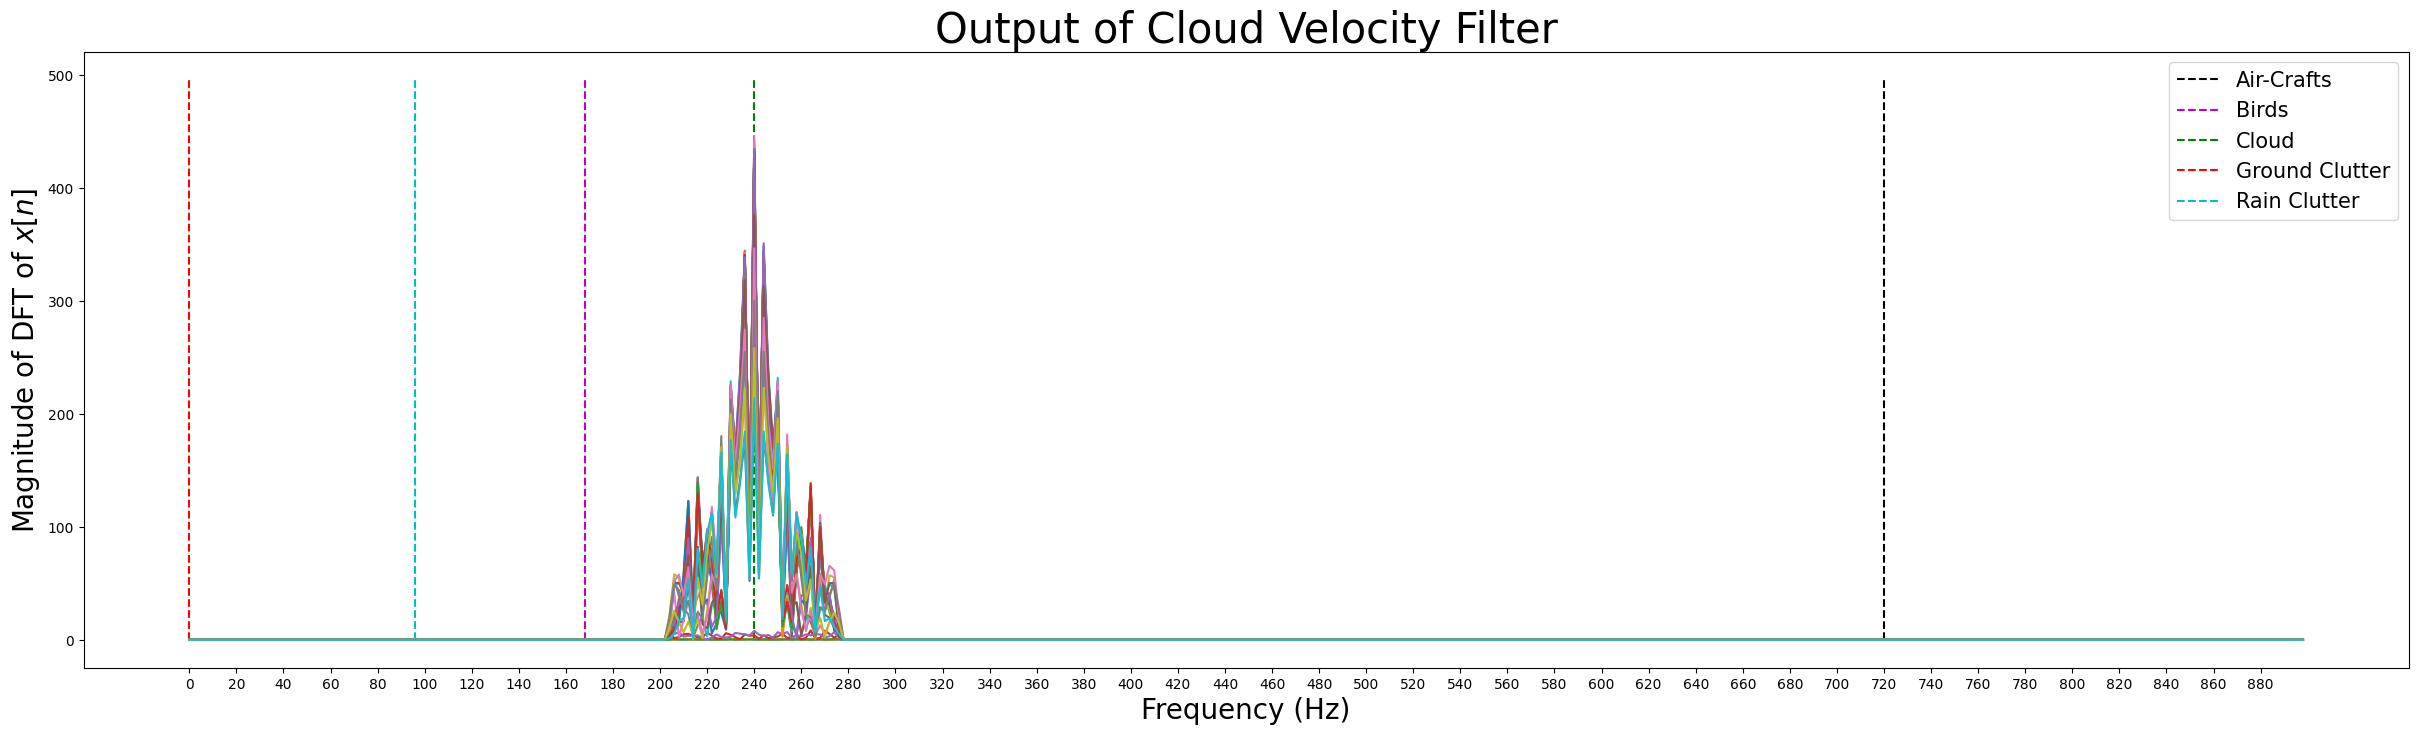

Rain Clutter  cut off frequencies  60.0 - 132.0 Hz


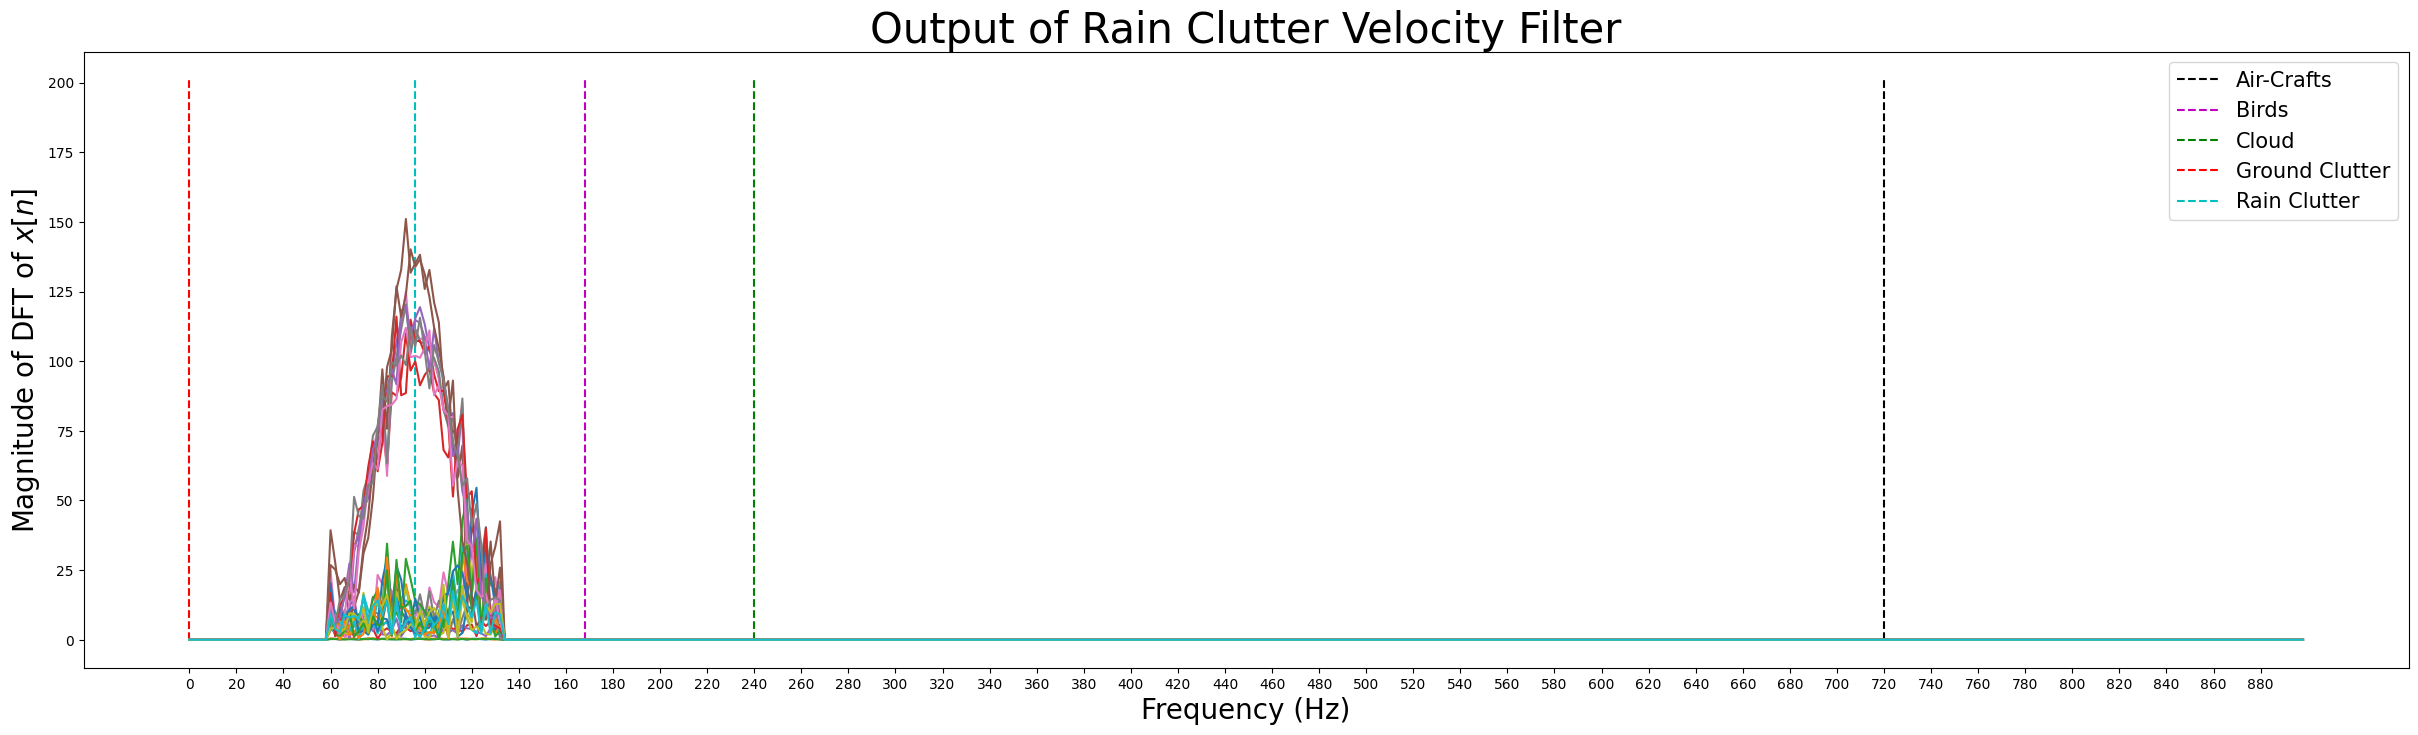

Birds  cut off frequencies  132.0 - 204.0 Hz


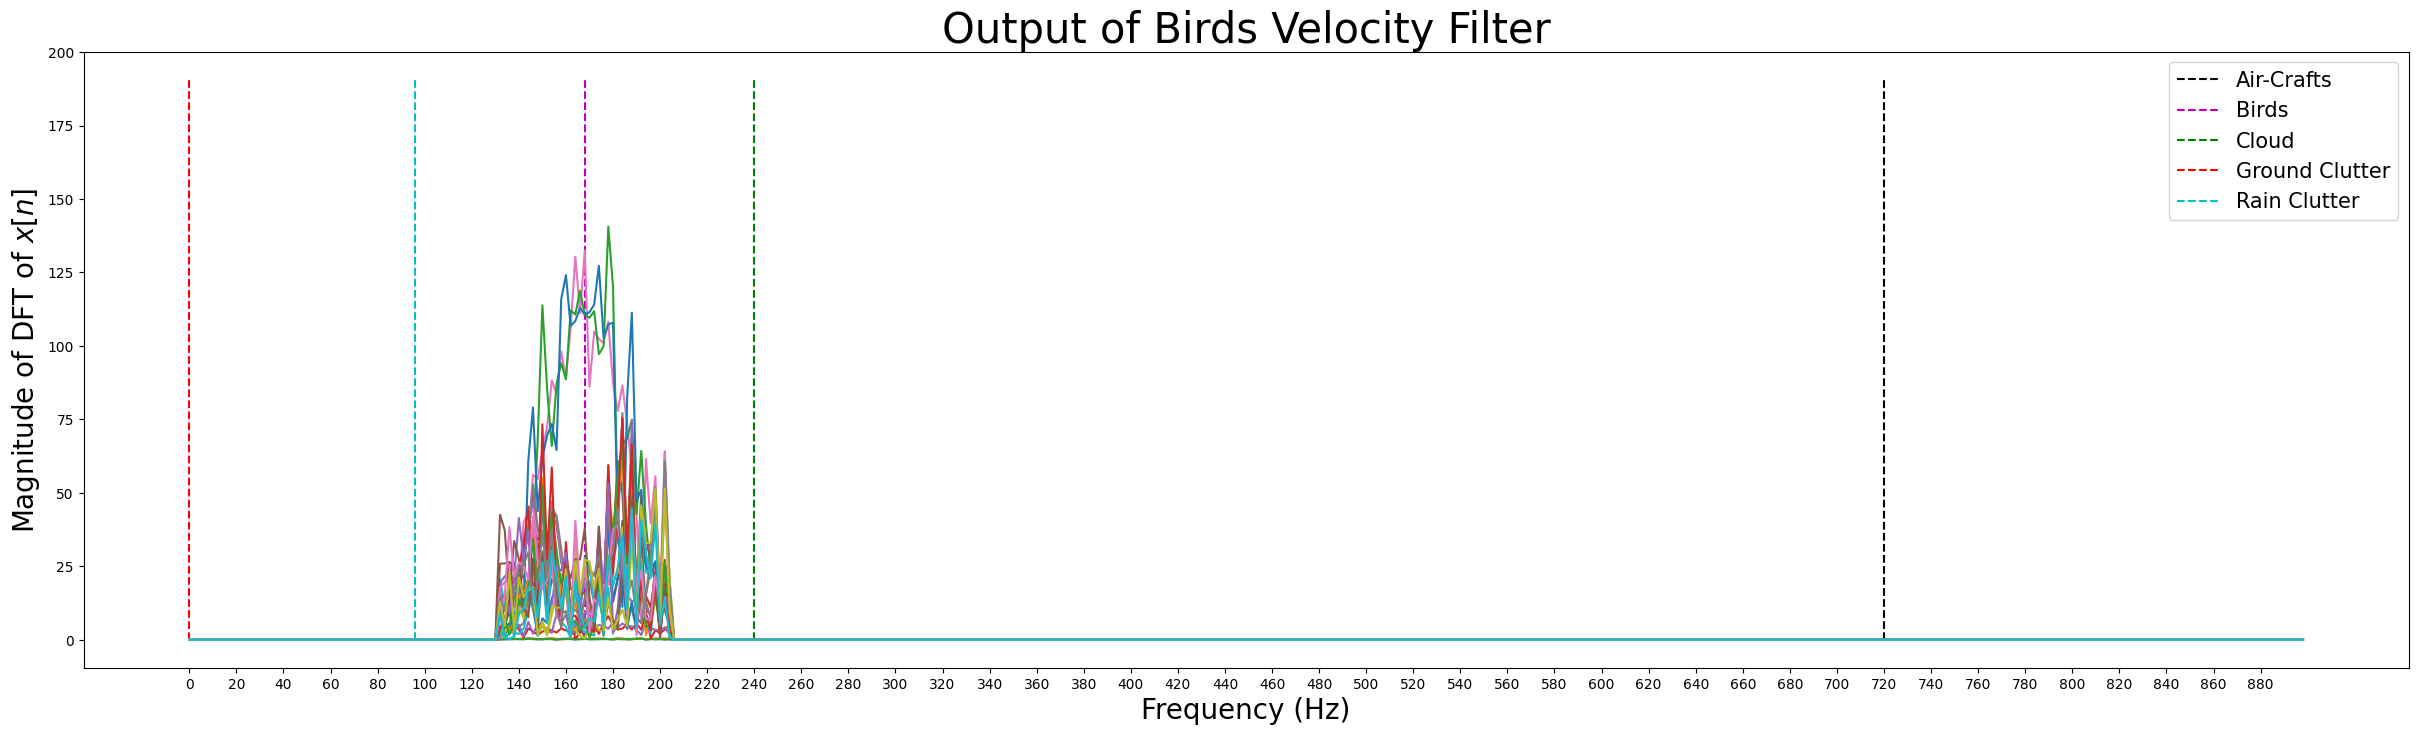

Air-Crafts  cut off frequencies  684.0 - 756.0 Hz


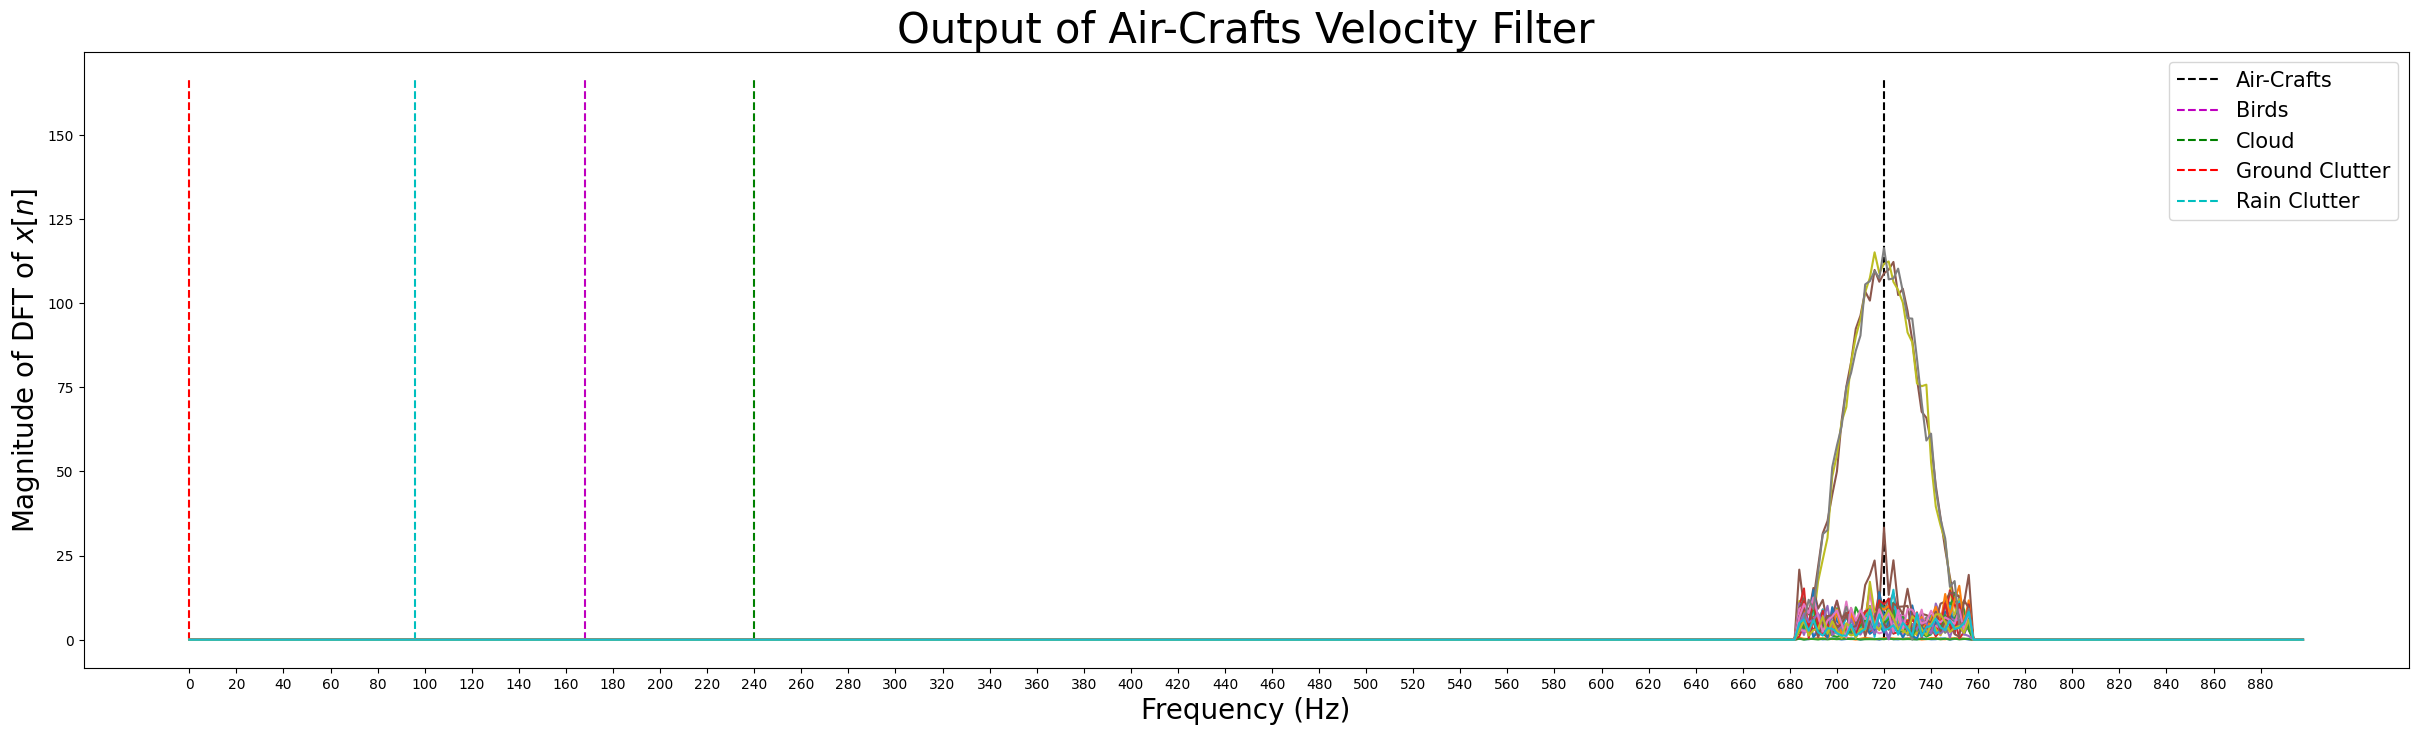

In [104]:
# implement filter bank, thresholding and encoding

dict_final = {}

# threshold and encode for ground clutter
GC_ENC = np.where(TH_phase < abs(DM_phase), 0, 2)
# write ground clutter into .csv file
np.savetxt("Ground Clutter.csv", GC_ENC, delimiter=",")

for key, val in dict_f_d.items():
  if (val != None and val != 0):
    print("======================================================================================================================================================")
    print(key, ' cut off frequencies ', val-BW, '-', val+BW, 'Hz')

    # define filter for each velocity
    filter = BPF(val-BW, val+BW, f_r, N, 0)

    # perform filtering
    filt_FFT = np.multiply(DM_FFT[:, :], filter)

    # plot output of the filter bank
    plot_FFT(filt_FFT, 'Output of '+key+' Velocity Filter', N, dict_f_d, f_r)

    # apply ifft
    DM_IFFT = np.fft.ifft(filt_FFT[:, :], axis=0)

    # thresholding and encoding
    TH = dict_obj[key][1]
    ENC = dict_obj[key][2]
    DM_final = (abs(DM_IFFT)>=TH)*ENC

    # add final matrix to final dictionary
    dict_final[key] = [DM_final, filter, abs(DM_IFFT)]

    # write final matrix into .csv file
    np.savetxt(key+".csv", DM_final, delimiter=",")


In [105]:
# visualize detected objects as a heatmap
def visualizer(matrix, dict_label, title, cmap):
  f,ax = plt.subplots(figsize=(12,10))
  ax.set_title(title)
  vmap = dict_label
  n = len(vmap)
  cmap = sns.color_palette(cmap, n)
  ax = sns.heatmap(matrix, cmap=cmap)

  colorbar = ax.collections[0].colorbar
  r = colorbar.vmax - colorbar.vmin
  colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
  colorbar.set_ticklabels(list(vmap.keys()))

  return None

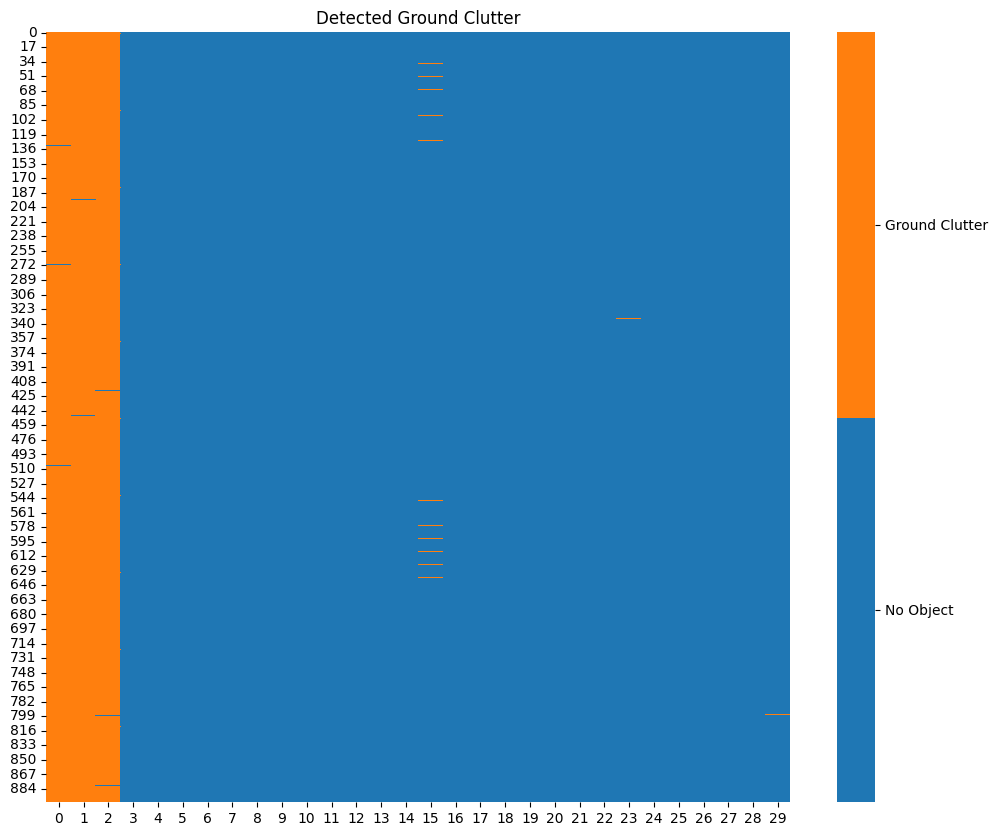

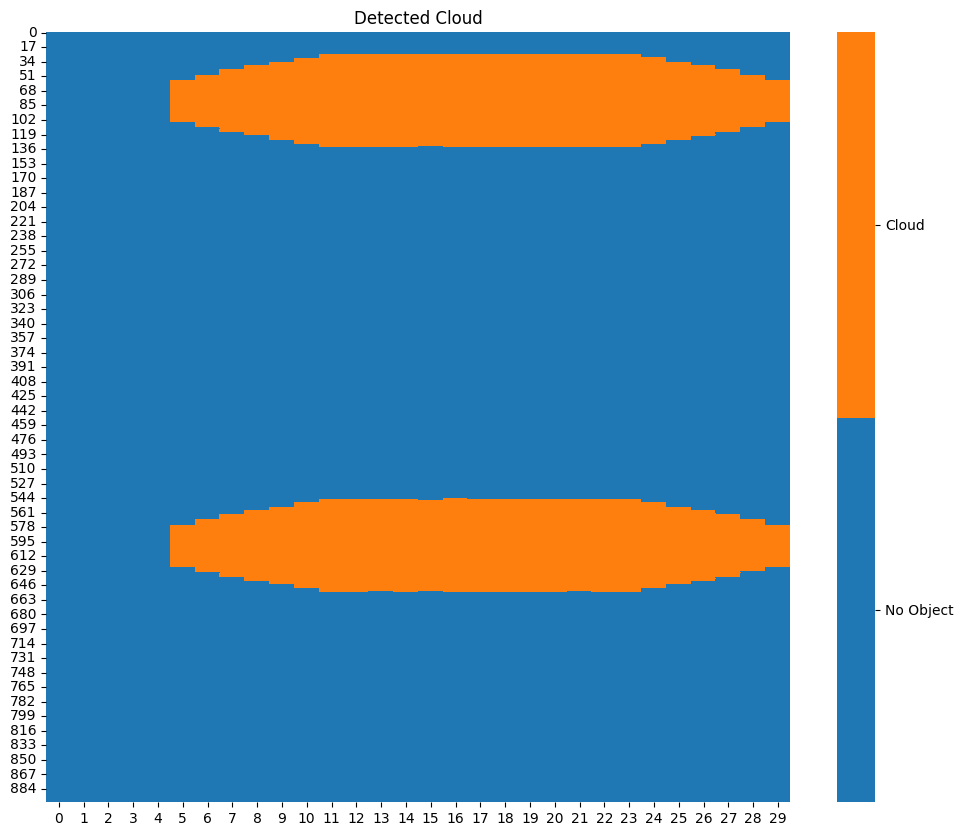

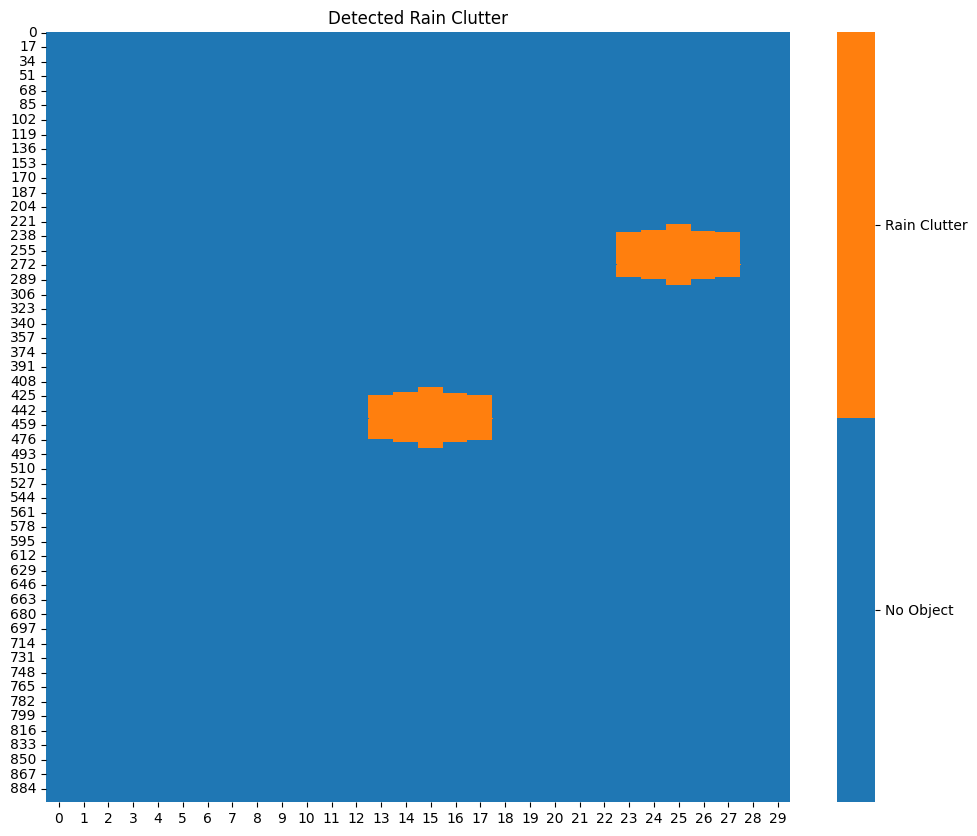

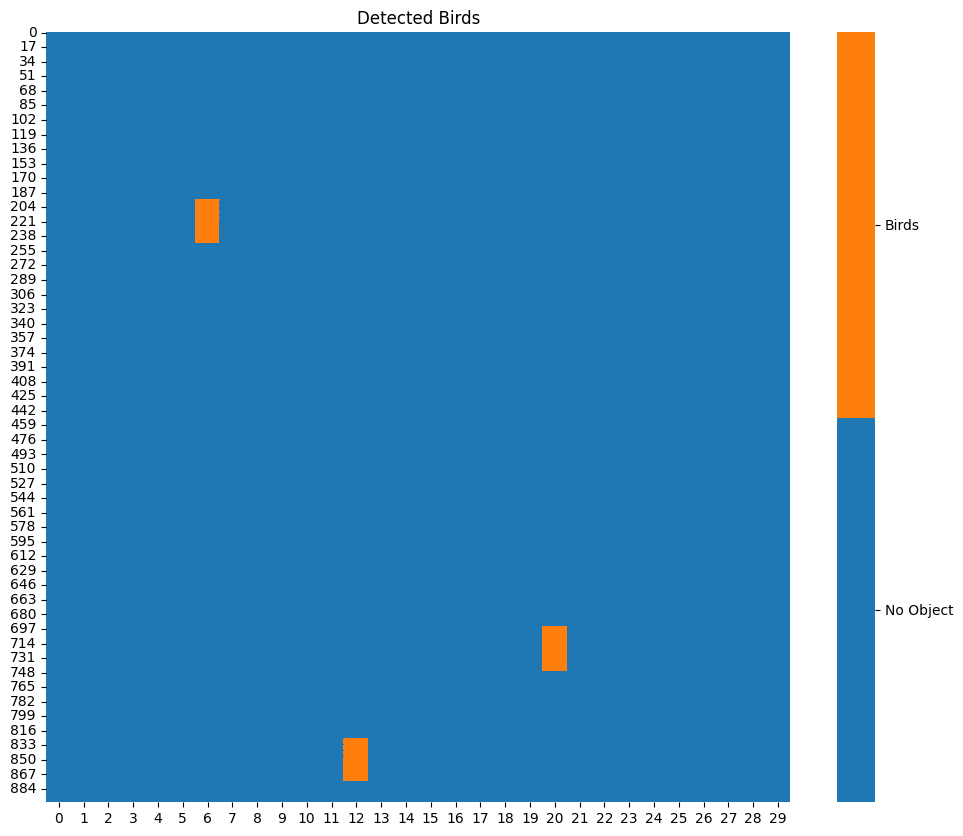

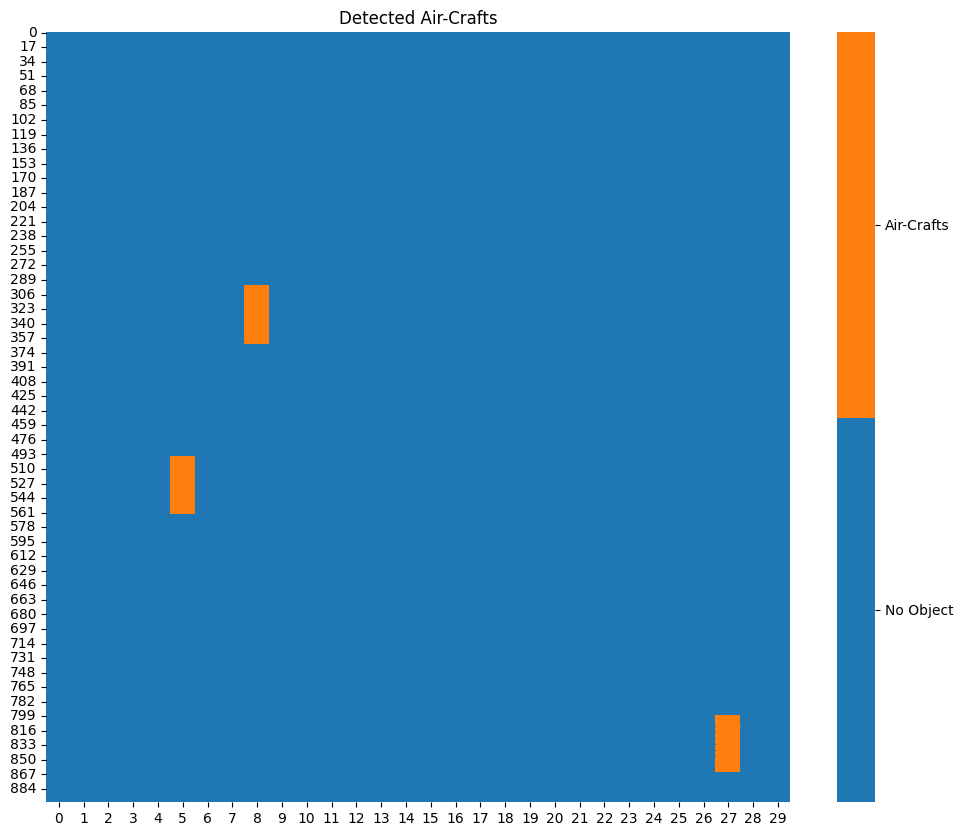

In [89]:
# show ground clutter
visualizer(GC_ENC,{'No Object':0, 'Ground Clutter':1},'Detected Ground Clutter','tab10')

all_DM = GC_ENC
# show other detected objects
for key,val in dict_final.items():
  DM_plot = val[0]
  all_DM +=DM_plot
  title = 'Detected '+key
  visualizer(DM_plot,{'No Object':0, key:np.max(DM_plot)},title,'tab10')

## Final Data Matrix

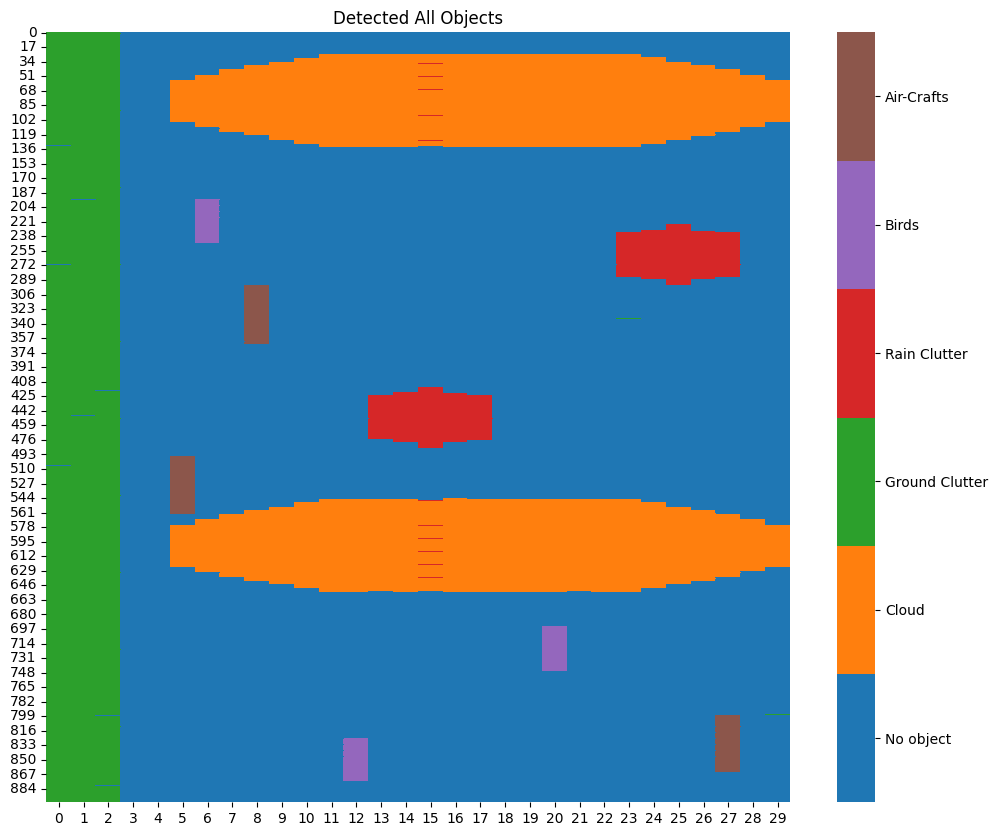

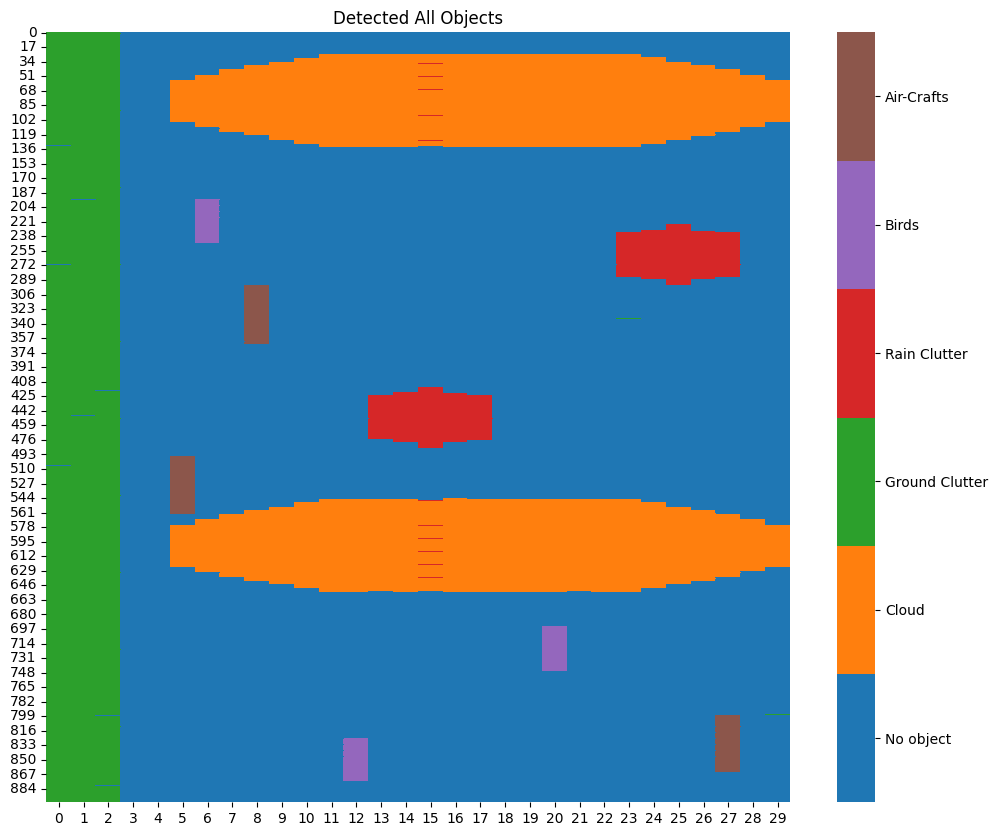

In [106]:
visualizer(all_DM, dict_obj, 'Detected All Objects', 'tab10')